## Import Libraries

In [1]:
import numpy as np
import os
import glob            
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [33]:
from skimage import filters, morphology

import itertools

# Shapely and Rasterio for processing geometries
from shapely.geometry import box, shape, Polygon
from shapely.ops import cascaded_union, transform
from rasterio import features   

In [508]:
import rasterio
import shapely 
from shapely import geometry 
import tiletanic 
import geopandas as gpd

In [29]:
#!pip install tensorflow==1.10.0

In [2]:
import keras

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Area of Interest 

Ghazibad Afghtanistan- goal is to indentify building data that might not be included in OSM lables, and convert model output rasters to vectors for additional analysis for other projects (ie change analysis). 


Two Different Modeling Approaches will be compared: 

* Predict from model weights trained from pixel decoder but derived from AOIs that have more buidlings +  better OSM coverage 

* Predict from model weights trained in similar areas of Afghanistan

## Config File Used

```json
{
  "country": "afghanistan",
  "bounding_box": [70.694, 34.243, 70.834, 34.399],
  "zoom": 16,
  "classes": [
    { "name": "Buildings", "filter": ["has", "building"] }
  ],
  "imagery": "./ghazibad3.tif",
  "background_ratio": 1,
  "ml_type": "segmentation"
}
```

## Load in LabelMaker Data

In [13]:
npz = np.load('./nuristan_buildings/data.npz')
x_train = npz['x_train']
y_train = npz['y_train']
x_test = npz['x_test']
y_test = npz['y_test']

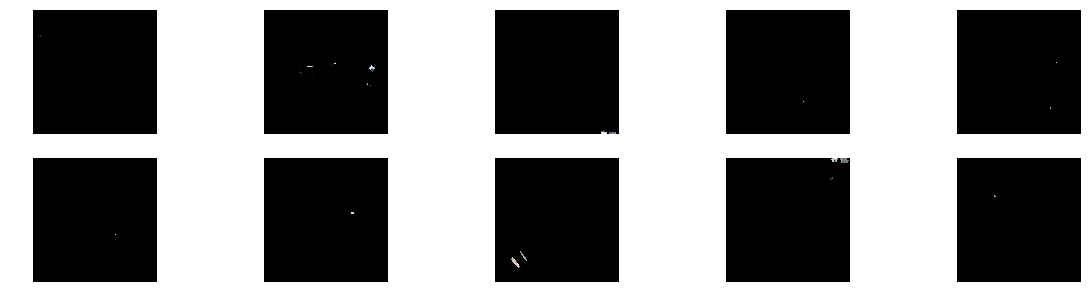

In [14]:
examples_dir = './nuristan_buildings/examples/Buildings/'

plt.figure(figsize=(20,5))

i = 0
for x in os.listdir(examples_dir):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    img = mpimg.imread(examples_dir + x)
    plt.imshow(img)
    i +=1 
    
plt.show()

In [559]:

from os import makedirs, path as op
from PIL import Image
import numpy as np
import os
import scipy.misc
labels = np.load('/Users/mmorrissey/repos/sandbox/nuristan_buildings/labels.npz') # The arrays in labels.npz are already 2D, just need to convert the numpy arrays to png 

for label in labels.files:
    new_label_dir = op.join(os.getcwd(), "new_labels_nuristan")
    if not op.isdir(new_label_dir):
        makedirs(new_label_dir)
    img = labels[label] * 255 # img is uint8 so we need to have the road pixels encoded with 255 instead of 1
    scipy.misc.imsave('{}/{}.png'.format(new_label_dir, label), img)
#     #print('Writing {}'.format(label))

In [16]:
tiles = './nuristan_buildings/tiles'

In [17]:
!pixel_decoder train --batch_size=4 \
                    --imgs_folder=tiles \
                    --masks_folder=new_labels \
                    --models_folder=nuristain_trained_models_out \
                    --model_id=resnet_unet \
                    --origin_shape_no=256 \
                    --border_no=32

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2019-08-26 22:57:00.100970: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
steps_per_epoch 51 validation_steps 17
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (

Epoch 1/10
 - 254s - loss: 0.6509 - dice_coef: 0.3147 - dice_coef_rounded: 0.3592 - binary_crossentropy: 0.4564 - val_loss: 0.9265 - val_dice_coef: 0.0230 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.6401
Epoch 2/10
 - 249s - loss: 0.5655 - dice_coef: 0.4043 - dice_coef_rounded: 0.4317 - binary_crossentropy: 0.3940 - val_loss: 0.9510 - val_dice_coef: 0.0111 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.7361
Epoch 3/10
 - 251s - loss: 0.5103 - dice_coef: 0.4628 - dice_coef_rounded: 0.4875 - binary_crossentropy: 0.3577 - val_loss: 0.9661 - val_dice_coef: 0.0051 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.8025
Epoch 4/10
 - 250s - loss: 0.5480 - dice_coef: 0.4254 - dice_coef_rounded: 0.4466 - binary_crossentropy: 0.3972 - val_loss: 0.9694 - val_dice_coef: 0.0044 - val_dice_coef_rounded: 0.0589 - val_binary_crossentropy: 0.8210
Epoch 5/10
 - 255s - loss: 0.4902 - dice_coef: 0.4875 - dice_coef_rounded: 0.5102 - binary_crossentropy: 0.3640 - va

Epoch 9/10
 - 268s - loss: 0.3177 - dice_coef: 0.5642 - dice_coef_rounded: 0.6104 - binary_crossentropy: 0.1997 - val_loss: 0.3864 - val_dice_coef: 0.5124 - val_dice_coef_rounded: 0.5526 - val_binary_crossentropy: 0.2852
Epoch 10/10
 - 268s - loss: 0.3259 - dice_coef: 0.5662 - dice_coef_rounded: 0.6143 - binary_crossentropy: 0.2181 - val_loss: 0.3774 - val_dice_coef: 0.5305 - val_dice_coef_rounded: 0.5672 - val_binary_crossentropy: 0.2853
Epoch 1/10
 - 271s - loss: 0.3280 - dice_coef: 0.5458 - dice_coef_rounded: 0.5925 - binary_crossentropy: 0.2018 - val_loss: 0.3867 - val_dice_coef: 0.4962 - val_dice_coef_rounded: 0.5431 - val_binary_crossentropy: 0.2696
Epoch 2/10
 - 270s - loss: 0.3193 - dice_coef: 0.5614 - dice_coef_rounded: 0.6103 - binary_crossentropy: 0.2000 - val_loss: 0.3819 - val_dice_coef: 0.5177 - val_dice_coef_rounded: 0.5598 - val_binary_crossentropy: 0.2815
Epoch 3/10
 - 267s - loss: 0.3128 - dice_coef: 0.5671 - dice_coef_rounded: 0.6120 - binary_crossentropy: 0.1926 - v

 - 268s - loss: 0.2339 - dice_coef: 0.5588 - dice_coef_rounded: 0.6247 - binary_crossentropy: 0.1648 - val_loss: 0.3089 - val_dice_coef: 0.5087 - val_dice_coef_rounded: 0.5702 - val_binary_crossentropy: 0.2481
Epoch 27/50
 - 267s - loss: 0.2232 - dice_coef: 0.5896 - dice_coef_rounded: 0.6597 - binary_crossentropy: 0.1609 - val_loss: 0.3105 - val_dice_coef: 0.5222 - val_dice_coef_rounded: 0.5815 - val_binary_crossentropy: 0.2547
Epoch 28/50
 - 267s - loss: 0.2324 - dice_coef: 0.5653 - dice_coef_rounded: 0.6316 - binary_crossentropy: 0.1650 - val_loss: 0.3157 - val_dice_coef: 0.5100 - val_dice_coef_rounded: 0.5674 - val_binary_crossentropy: 0.2576
Epoch 29/50
 - 268s - loss: 0.2335 - dice_coef: 0.5630 - dice_coef_rounded: 0.6395 - binary_crossentropy: 0.1656 - val_loss: 0.3217 - val_dice_coef: 0.4837 - val_dice_coef_rounded: 0.5360 - val_binary_crossentropy: 0.2568
Epoch 30/50
 - 268s - loss: 0.2283 - dice_coef: 0.5743 - dice_coef_rounded: 0.6486 - binary_crossentropy: 0.1625 - val_loss:

 - 268s - loss: 0.3449 - dice_coef: 0.6317 - dice_coef_rounded: 0.6567 - binary_crossentropy: 0.2124 - val_loss: 0.4162 - val_dice_coef: 0.5654 - val_dice_coef_rounded: 0.5877 - val_binary_crossentropy: 0.3119
Epoch 14/50
 - 267s - loss: 0.3651 - dice_coef: 0.6072 - dice_coef_rounded: 0.6314 - binary_crossentropy: 0.2081 - val_loss: 0.4233 - val_dice_coef: 0.5581 - val_dice_coef_rounded: 0.5813 - val_binary_crossentropy: 0.3183
Epoch 15/50
 - 267s - loss: 0.3557 - dice_coef: 0.6170 - dice_coef_rounded: 0.6411 - binary_crossentropy: 0.2006 - val_loss: 0.4273 - val_dice_coef: 0.5539 - val_dice_coef_rounded: 0.5763 - val_binary_crossentropy: 0.3204
Epoch 16/50
 - 267s - loss: 0.3280 - dice_coef: 0.6464 - dice_coef_rounded: 0.6712 - binary_crossentropy: 0.1830 - val_loss: 0.4176 - val_dice_coef: 0.5657 - val_dice_coef_rounded: 0.5863 - val_binary_crossentropy: 0.3234
Epoch 17/50
^C
Traceback (most recent call last):
  File "/anaconda3/envs/lm_36/bin/pixel_decoder", line 11, in <module>
   

## Predict

In [31]:

new_label_dir = op.join(os.getcwd(), "nuristan_test_tiles/")
if not op.isdir(new_label_dir):
    makedirs(new_label_dir)

from os import path, listdir, mkdir
for f in listdir(path.join("./nuristan_buildings/tiles/")):
    #print(f)
    img = "./nuristan_buildings/tiles/" + f
    im = Image.open(img)
    im.save(('nuristan_test_tiles/' + f).replace(".jpg",".tif"))

In [21]:
!pixel_decoder predict --imgs_folder=tiles \
                       --test_folder=nuristan_test_tiles \
                      --models_folder=nuristan_trained_models_out \
                      --pred_folder=predictions \
                      --model_id=resnet_unet \
                      --origin_shape_no=256

/anaconda3/envs/lm_36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2019-08-27 13:59:36.285145: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
100%|███████████████████████████████████████████| 71/71 [01:43<00:00,  1.46s/it]


In [22]:

def grey2rgb(img):
    """
    Create model prediction result to 3 channel
    """
    new_img = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img.append([img[i][j]]*3)
    new_img = np.array(new_img).reshape(img.shape[0], img.shape[1], 3)
    return new_img

In [23]:
preds = listdir(path.join("/Users/mmorrissey/repos/sandbox/predictions/nuristan_resnet_unet/"))

In [25]:
pred_list = [op.basename(f).split(".")[0] for f in preds]

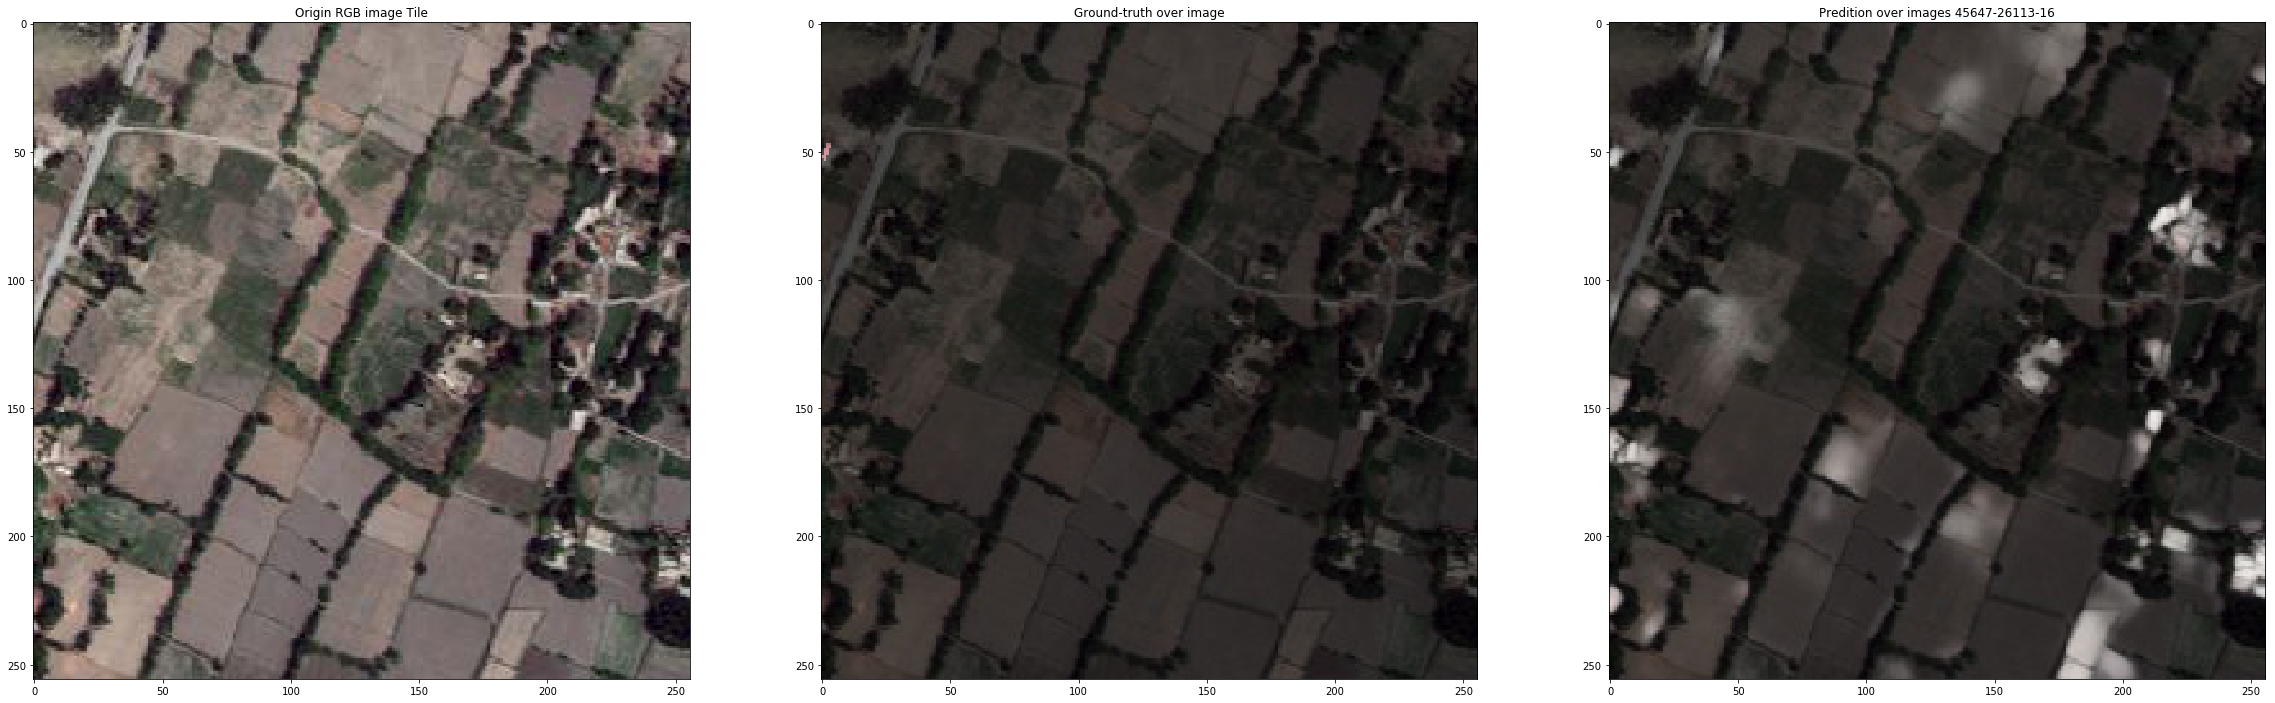

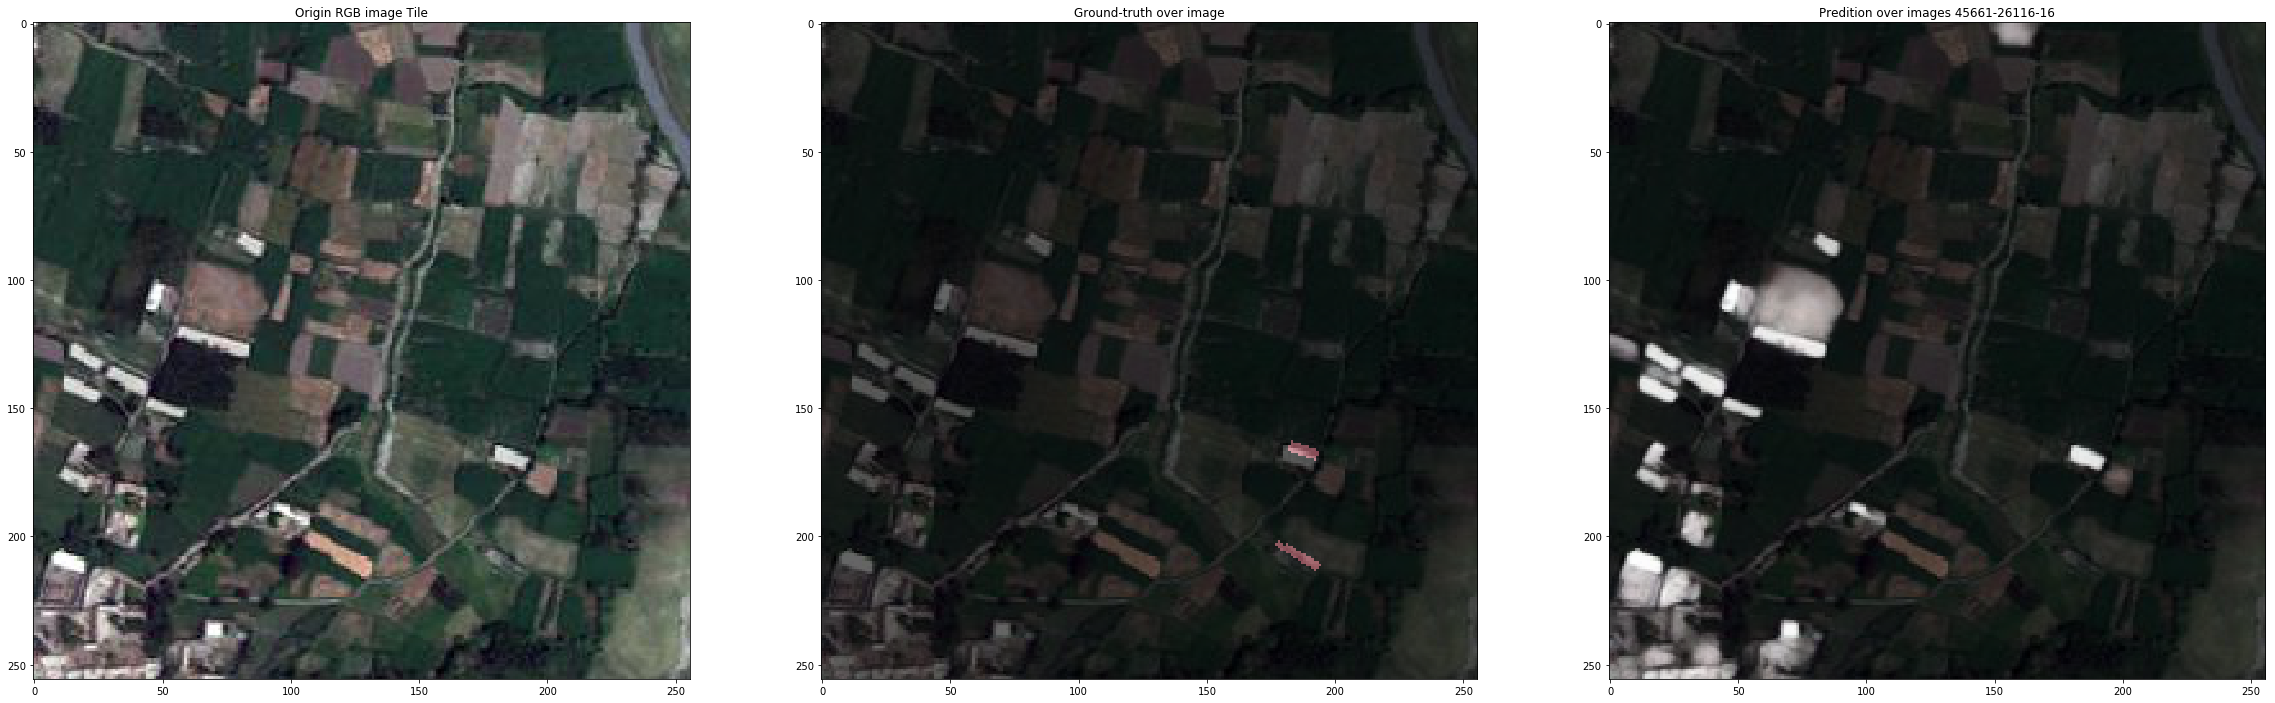

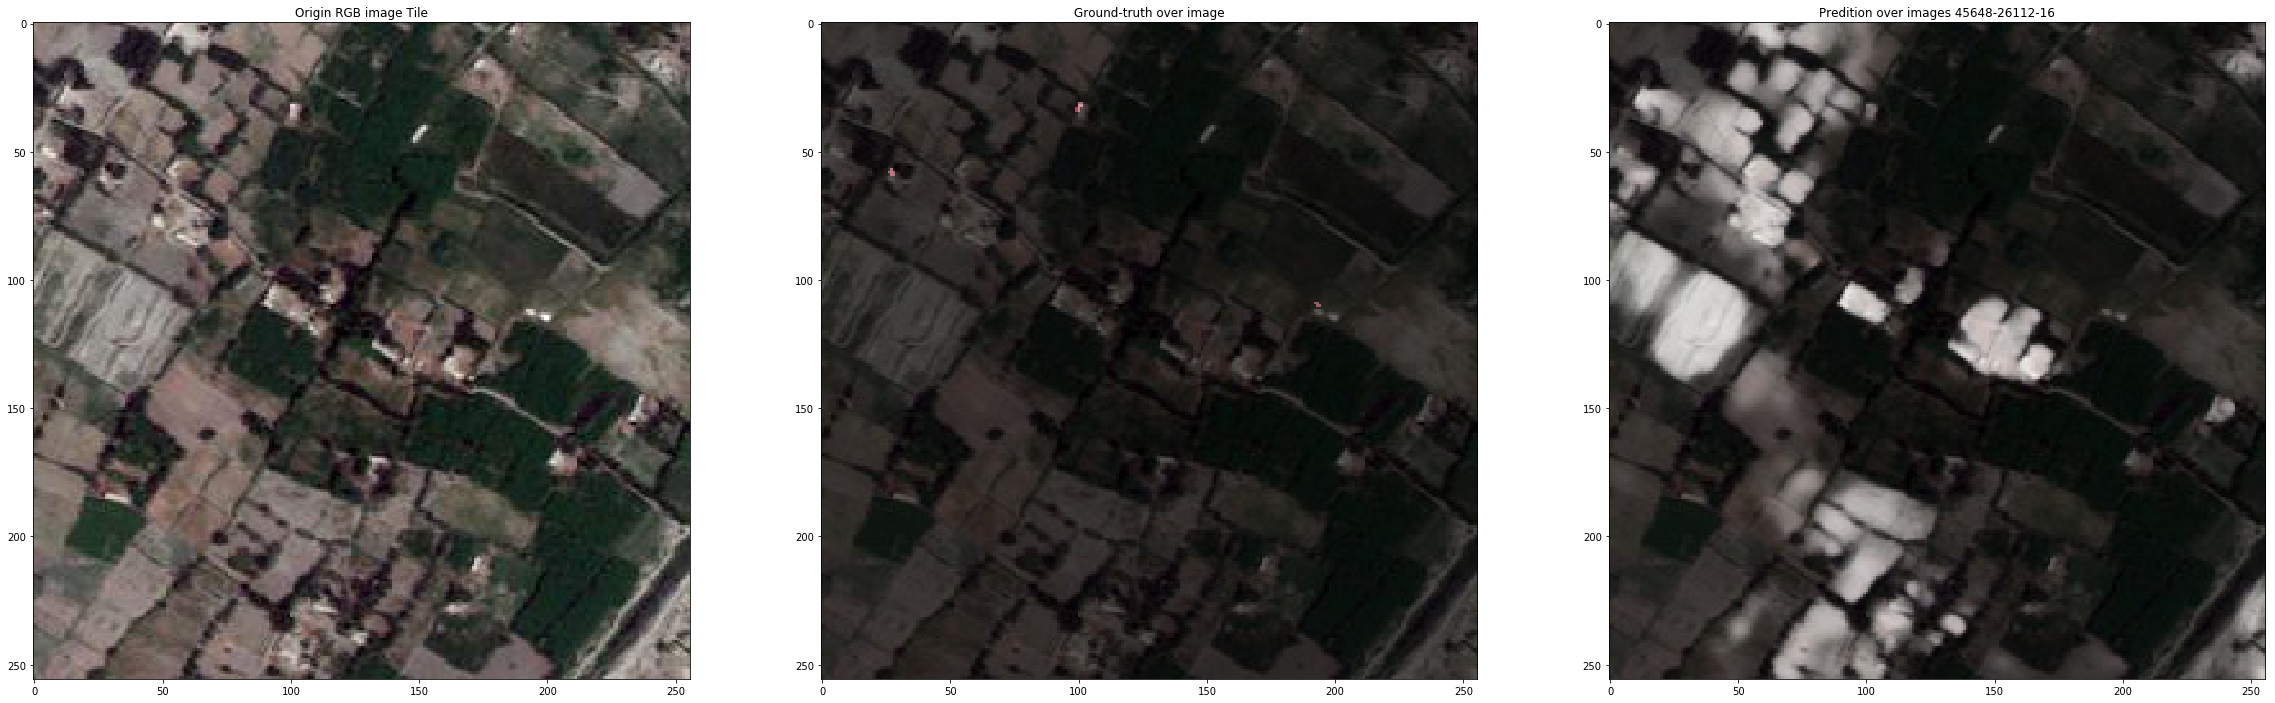

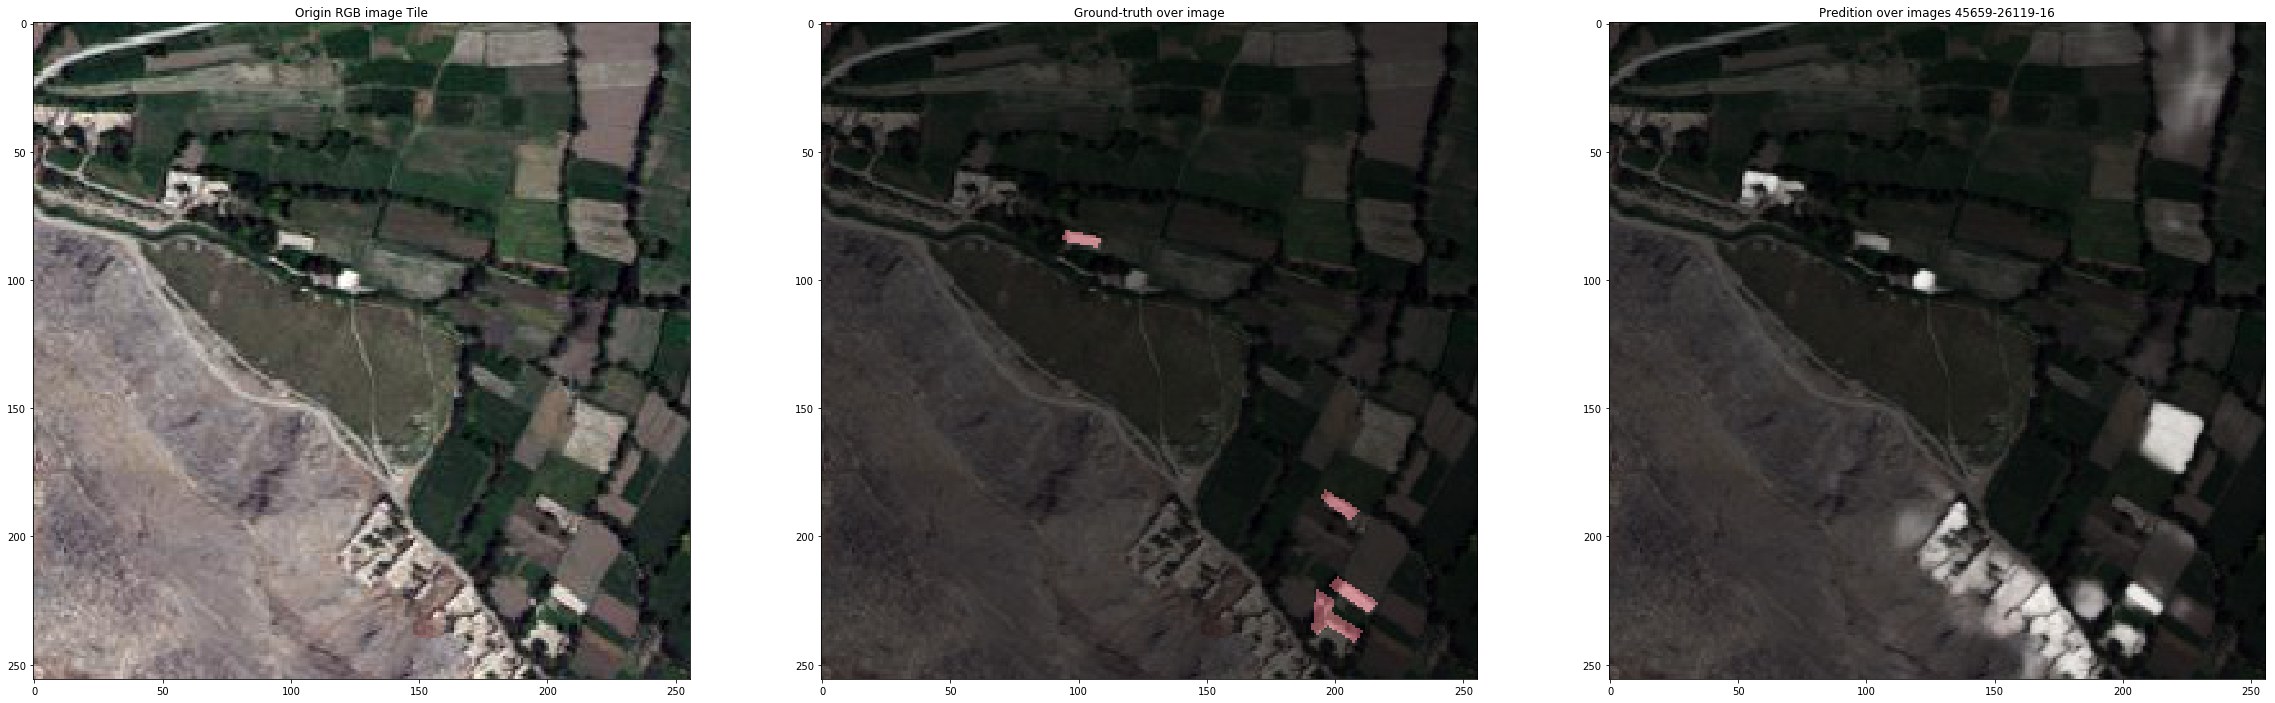

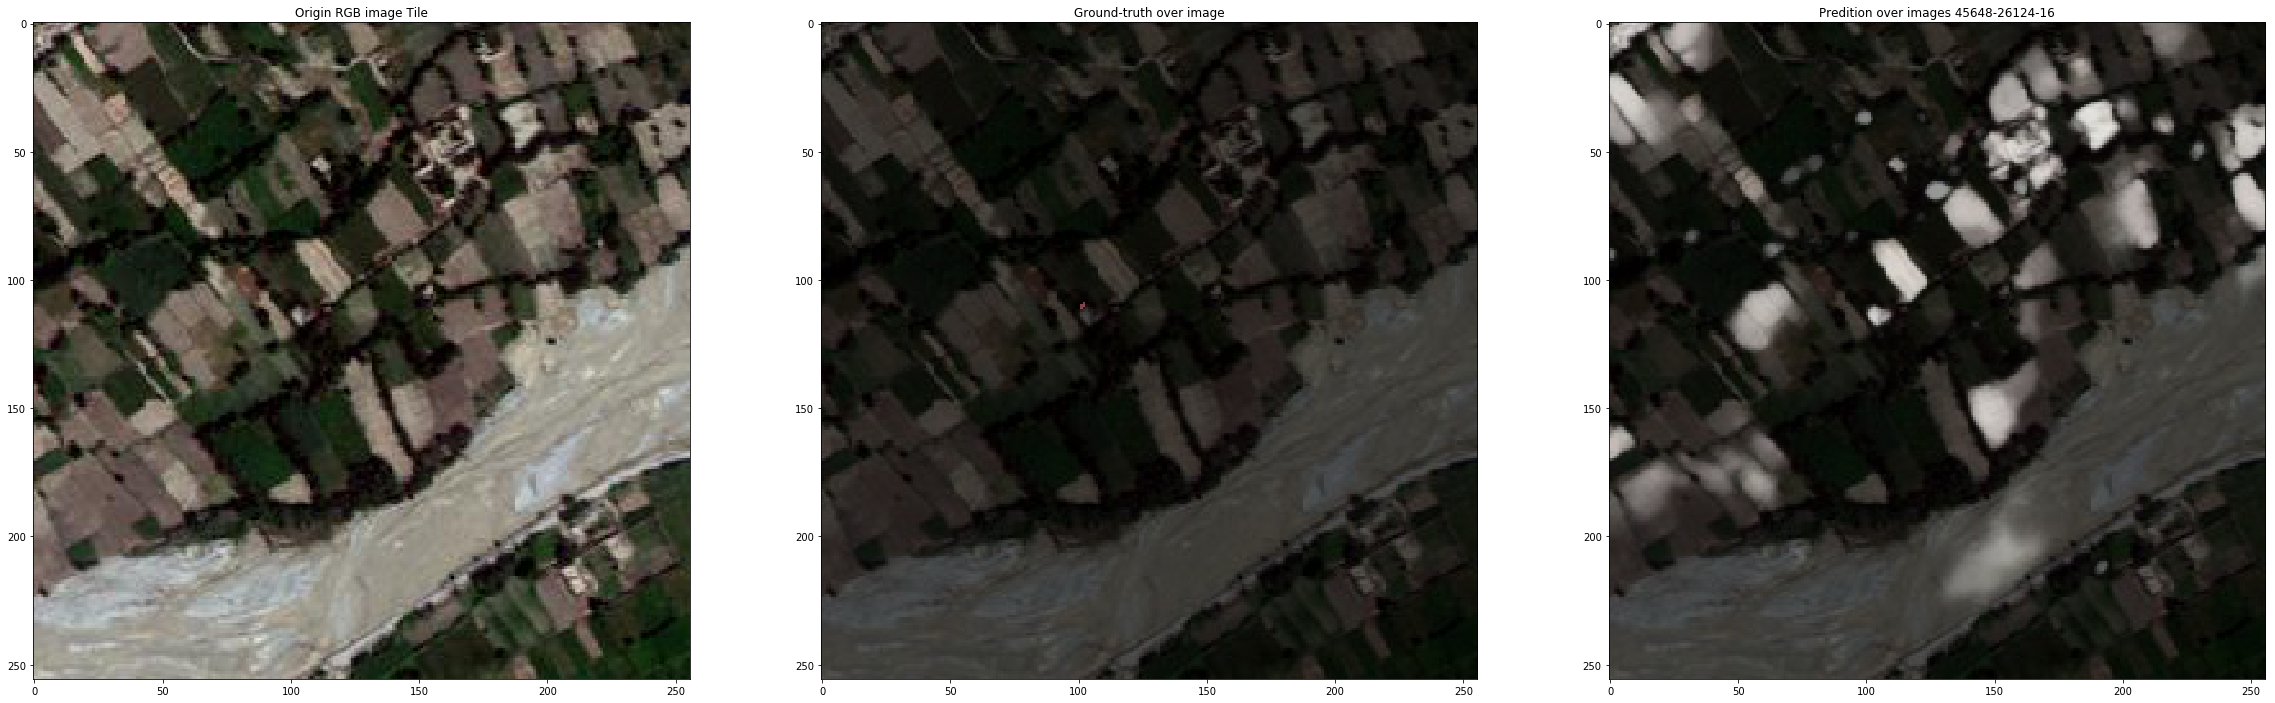

In [545]:
#model training stopped early,

new_label_dir = op.join(os.getcwd(), "nuristan_result_figures")
if not op.isdir(new_label_dir):
    makedirs(new_label_dir)

for pred in pred_list[0:5]:

    img = mpimg.imread("nuristan_buildings/tiles/{}.jpg".format(pred))
    mask = mpimg.imread("nuristan_buildings/labels/{}.png".format(pred))
    pred_mask = grey2rgb(mpimg.imread("predictions/nuristan_resnet_unet/{}.png".format(pred)))
    masked = np.ma.masked_where(pred_mask >=1, pred_mask) 

    fig, ax =  plt.subplots(1, 3, figsize=(40, 20))
    ax[-3].imshow(img, 'gray', interpolation='none')
    ax[-3].set_title('Origin RGB image Tile')

    ax[-2].imshow(img, 'gray', interpolation='none')
    ax[-2].imshow(mask, 'jet', interpolation='none', alpha=0.6)
    ax[-2].set_title('Ground-truth over image')

    ax[-1].imshow(img, 'gray', interpolation='none')
    ax[-1].imshow(masked, 'jet', interpolation='none', alpha=0.6)
    ax[-1].set_title('Predition over images ' + str(pred))

    fig.savefig("nuristan_result_figures/buildings_pred_{}.png".format(pred))

## Convet Output Masks to Vectors


steps: 

* binary mask from prediction mask 
* get tile bounds (using tiletanic, and x, y, z from file name)
* reproject to WGS84
* create affine from tile bounds + tile width/height for the image 
* convert raster to vector 
* write out to vector using geopandas 

### Helper Functions

In [574]:
#TO-Do: work on seperating indivdual buildings better so vectors are less blob like

def binary_mask_cleaned(pred_mask, threshold = 0.5, min_size = 50):

    '''
    pred_mask: numpy array of prediction 
    threshold: (int), masking output value threshold for building vs. no building
    min_size: (int), size used to filter out noise
    
    returns binary version of prediction mask
    '''
    
    masked = np.ma.masked_where(pred_mask >=1, pred_mask) 
    binary_mask = pred_mask > 0.05
    binary_mask_cleaned = morphology.remove_small_objects(binary_mask, min_size = 50 , connectivity=1)
    return binary_mask_cleaned   

In [553]:
def get_tile_bounds_reproject(x, y, z):
    '''
    Returns tile bounds re-projected into WGS84 (EPSG 4326) from prediction file name, since
    prediction file name follows OSM tile naming convetion. 
    
    x: (int) WebMercator tile x value 
    y: (int) WebMercator tile y value
    z: (int) zoom level
    '''
    tiler = tileschemes.WebMercator()
    test = Tile(x, y, z)
    poly = geometry.box(*tiler.bbox(test))
    
    project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:3857'), # source coordinate system
    pyproj.Proj(init='epsg:4326')) # destination coordinate system
    poly_r = transform(project, poly)
    
    return poly_r

In [524]:
def tile_w(poly):
    '''
    poly: shapely polygon
    returns width of shapely polygon. 
    '''
    return poly.bounds[2] - poly.bounds[0]

In [525]:
def tile_h(poly):
    '''
    poly: shapely polygon
    returns height of shapely polygon.  
    '''
    
    return poly.bounds[3] - poly.bounds[1]

In [526]:
def new_affine(poly, width, height): 
    '''
    affine for transform to get spatial information out of raster prediction
    '''
    
    return affine.Affine(width/256, 0.0, poly.bounds[0], 0.0, (0-height/256), poly.bounds[3])

In [527]:
def raster_to_vector(binary_mask_cleaned, new_affine):
    polygon_generator = features.shapes(binary_mask_cleaned.astype('uint8'), mask=binary_mask_cleaned, transform=new_affine)
    polygons = [shape(g).buffer(0) for g,v in polygon_generator]
    return polygons

In [541]:
def write_polys(polygons, outfile):
    '''
    returns shapefile to home directory with folder named the string input for outfile
    '''
    predicted_buildings_f = gpd.GeoSeries(polygons)
    predicted_buildings_f.to_file(outfile)
    print(outfile + ' is written!')

In [557]:
def raster_to_vector_flow(pred_mask, pred_file_name_xyz, outfile_str, threshold = 0.5, min_size = 50):
    
    '''
    converts model output raster into vector for a tile
    
    '''
    
    binary_mask_cleaned_out = binary_mask_cleaned(pred_mask, threshold = 0.5, min_size = 50)
    
    poly_r = get_tile_bounds_reproject(pred_file_name_xyz[0], pred_file_name_xyz[1], pred_file_name_xyz[2])
    
    tile_w_out = tile_w(poly_r)
    
    tile_h_out = tile_h(poly_r)
    
    new_affine_out = new_affine(poly_r, tile_w_out, tile_h_out)
    
    polygons = raster_to_vector(binary_mask_cleaned_out, new_affine_out)
    
    write_polys(polygons, outfile_str)

In [538]:
pred_list_s = pred_list[:3]

In [539]:
pred_list_s

['45647-26113-16', '45661-26116-16', '45648-26112-16']

In [558]:
for x in pred_list_s:
    
    print('on tile ' + x)
    pred_mask = mpimg.imread("predictions/nuristan_resnet_unet/" + x + '.png')

    pred_file_name_xyz = [int(i) for i in x.split("-")]

    raster_to_vector_flow(pred_mask, pred_file_name_xyz, x, threshold = 0.5, min_size = 50)

on tile 45647-26113-16
45647-26113-16 is written!
on tile 45661-26116-16
45661-26116-16 is written!
on tile 45648-26112-16
45648-26112-16 is written!


### Sample Raster Prediction

In [572]:
pred_mask = mpimg.imread("predictions/nuristan_resnet_unet/45661-26116-16.png")

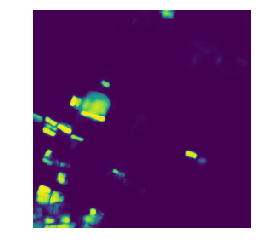

In [573]:

plt.axis('off')
plt.imshow(pred_mask)

### Sample Corresponding Vector Output

/anaconda3/envs/lm_36/lib/python3.6/site-packages/geopandas/plotting.py:400: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


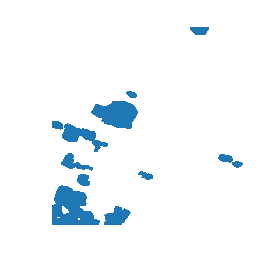

In [570]:
vector = gpd.read_file('45661-26116-16/45661-26116-16.shp')


f, ax = plt.subplots(1)
ax = vector.plot(axes=ax)
ax.set_axis_off()
plt.show()